 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [104]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [130]:
# Reading whale returns
whale_returns_csv = Path("Instructions/Starter_Code/Resources/whale_returns.csv")

# YOUR CODE HERE
whale_portfolio = pd.read_csv(whale_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")

whale_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
# Count nulls

# YOUR CODE HERE
whale_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON &amp; CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [132]:
# Drop nulls
# YOUR CODE HERE
whale_portfolio = whale_portfolio.dropna().copy()
whale_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON &amp; CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [134]:
# Reading algorithmic returns
algo_returns_csv = Path("Instructions/Starter_Code/Resources/algo_returns.csv")
# YOUR CODE HERE
algo_portfolio = pd.read_csv(algo_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
algo_portfolio.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [135]:
# Count nulls
# YOUR CODE HERE
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [136]:
# Drop nulls
# YOUR CODE HERE
algo_portfolio = algo_portfolio.dropna().copy()
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [137]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Instructions/Starter_Code/Resources/sp500_history.csv")
# YOUR CODE HERE

sp500_portfolio = pd.read_csv(sp500_history_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
sp500_portfolio.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [138]:
# Check Data Types
# YOUR CODE HERE
sp500_portfolio.dtypes

Close    object
dtype: object

In [139]:
sp500_portfolio["Close"] = sp500_portfolio["Close"].str.replace("$", "")

In [141]:
# Fix Data Types
# YOUR CODE HERE
sp500_portfolio["Close"] = sp500_portfolio["Close"].astype("float")

sp500_portfolio.dtypes

Close    float64
dtype: object

In [142]:
# Calculate Daily Returns
# YOUR CODE HERE

daily_return = sp500_portfolio.pct_change()

daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [143]:
# Drop nulls
# YOUR CODE HERE

daily_return = daily_return.dropna().copy()
daily_return.isnull().sum()

Close    0
dtype: int64

In [144]:
# Rename Column
# YOUR CODE HERE

daily_return = daily_return.rename(columns={
    "Close": "S&P 500"
})

daily_return.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [147]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
cp = pd.concat([whale_portfolio, algo_portfolio, daily_return], axis='columns', join='inner')

cp.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa5a3ac20a0&gt;

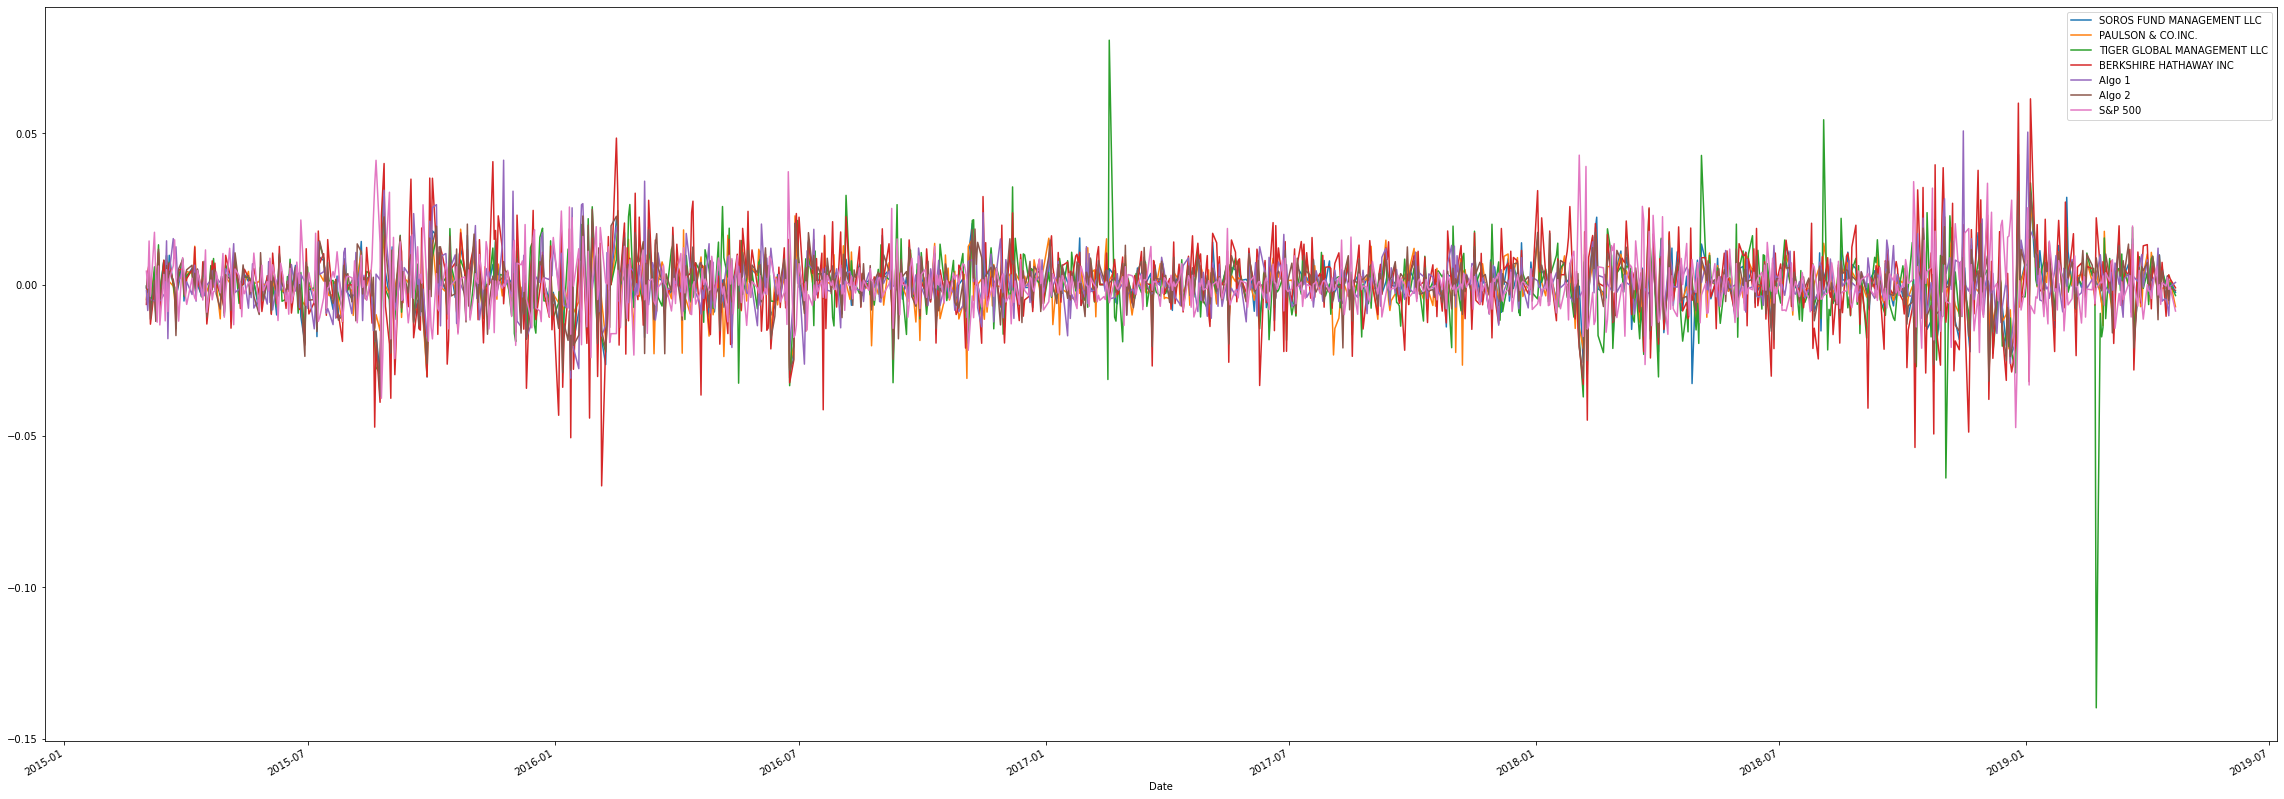

In [191]:
# Plot daily returns
# YOUR CODE HERE
cp.plot(figsize=(40,15))

In [161]:
cumulative_returns = (1 + cp).cumprod()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa5a4e42460&gt;

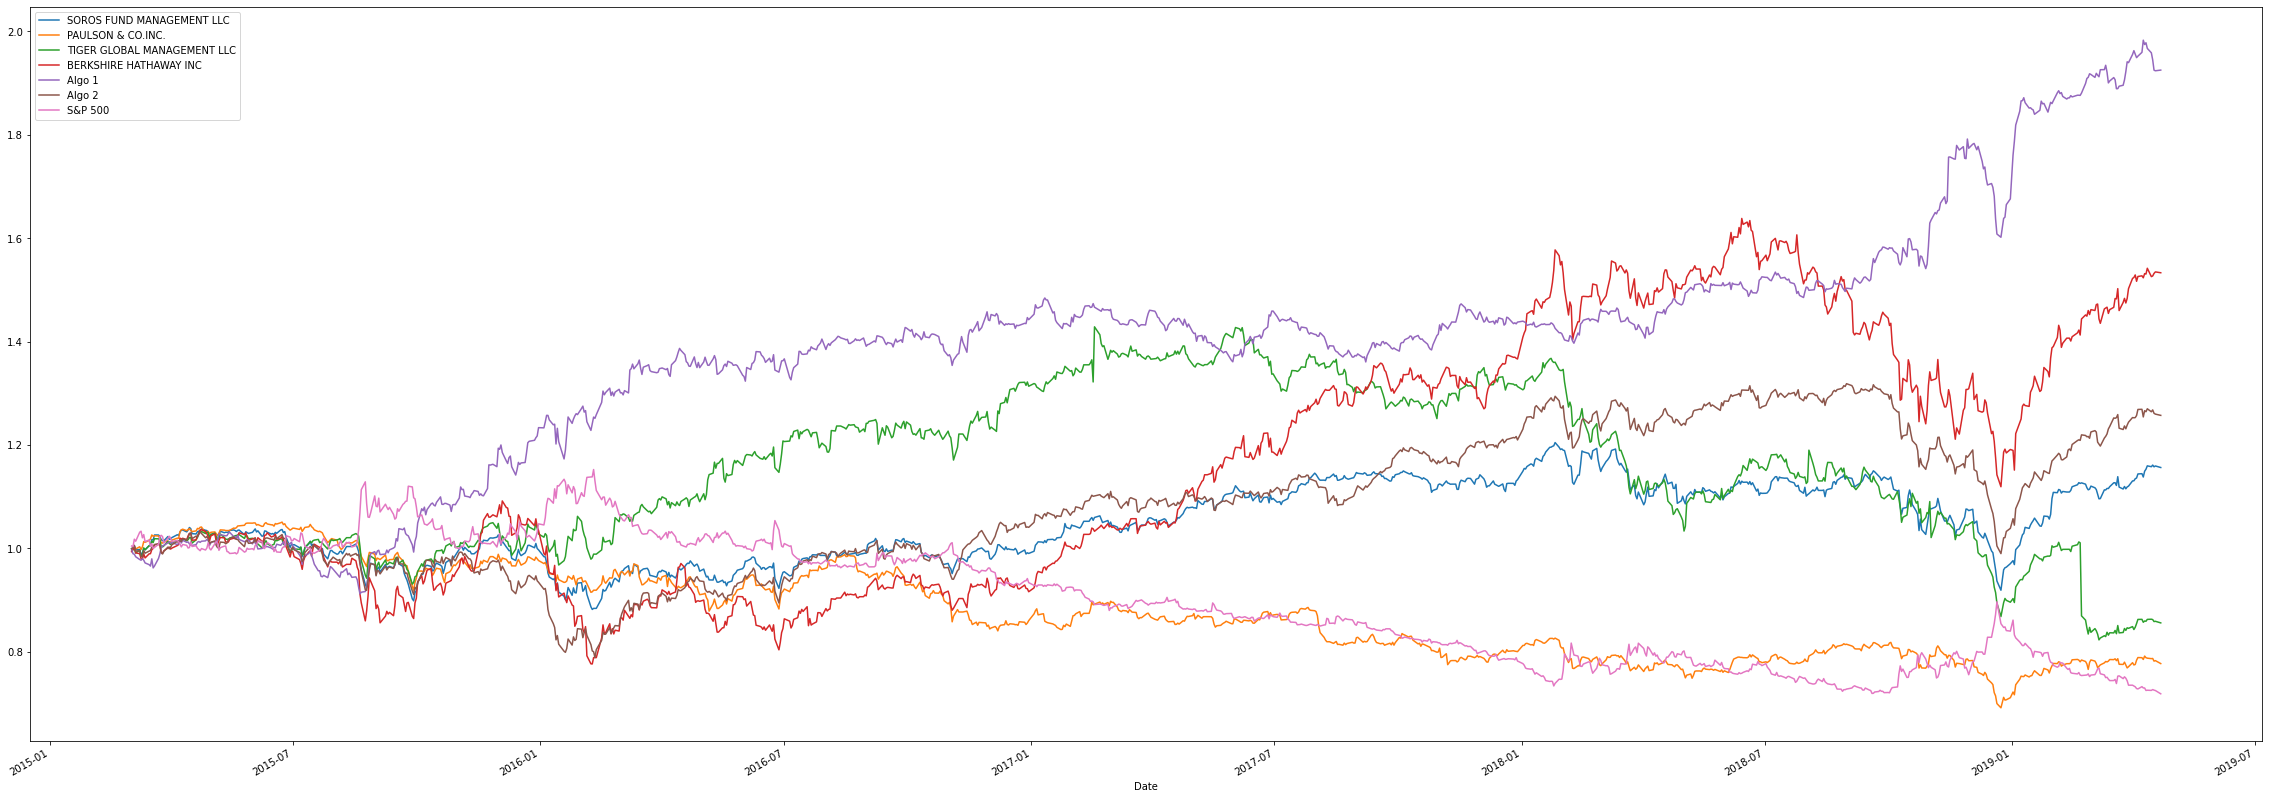

In [190]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns.plot(figsize=(40,15))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa5a2a39e50&gt;

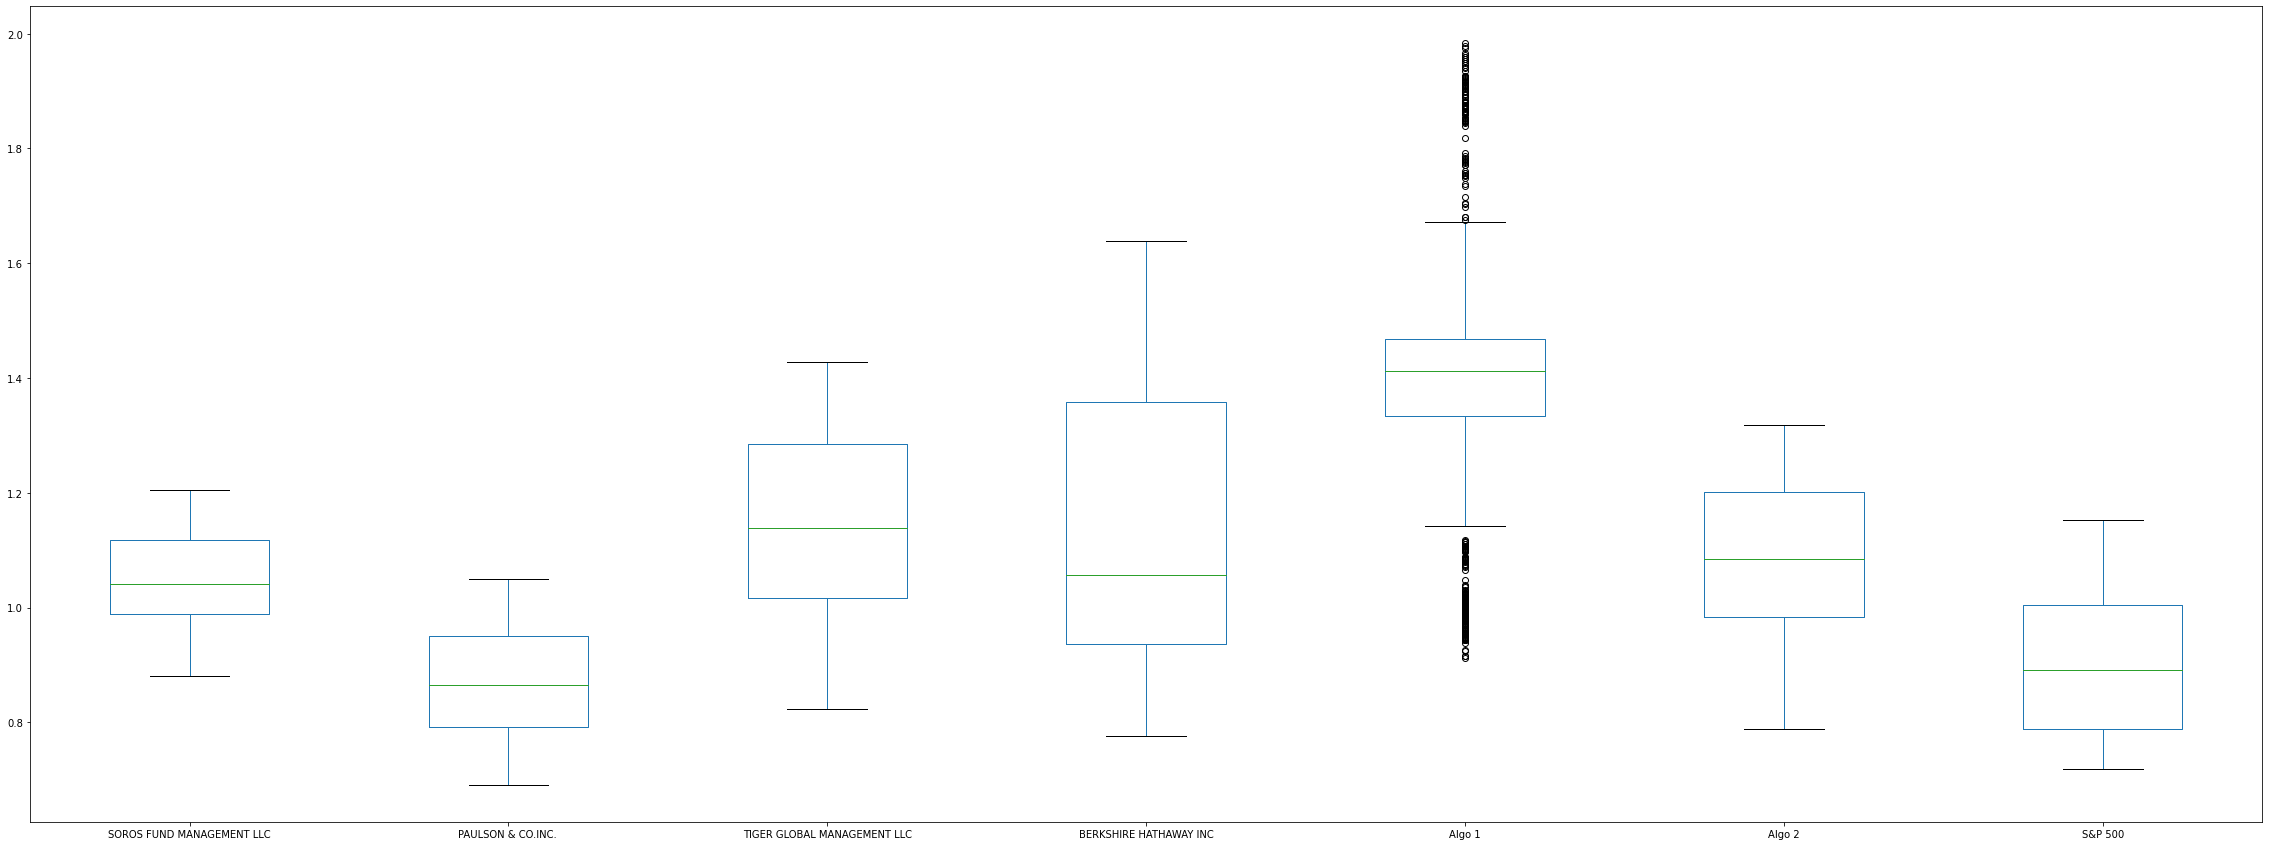

In [189]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_returns.plot.box(figsize=(40,15))

In [166]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
cumulative_daily_std = cp.std()
cumulative_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON &amp; CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&amp;P 500                        0.008587
dtype: float64

In [171]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
cumulative_daily_std > cp["S&P 500"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON &amp; CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&amp;P 500                        False
dtype: bool

In [173]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = cumulative_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON &amp; CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&amp;P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

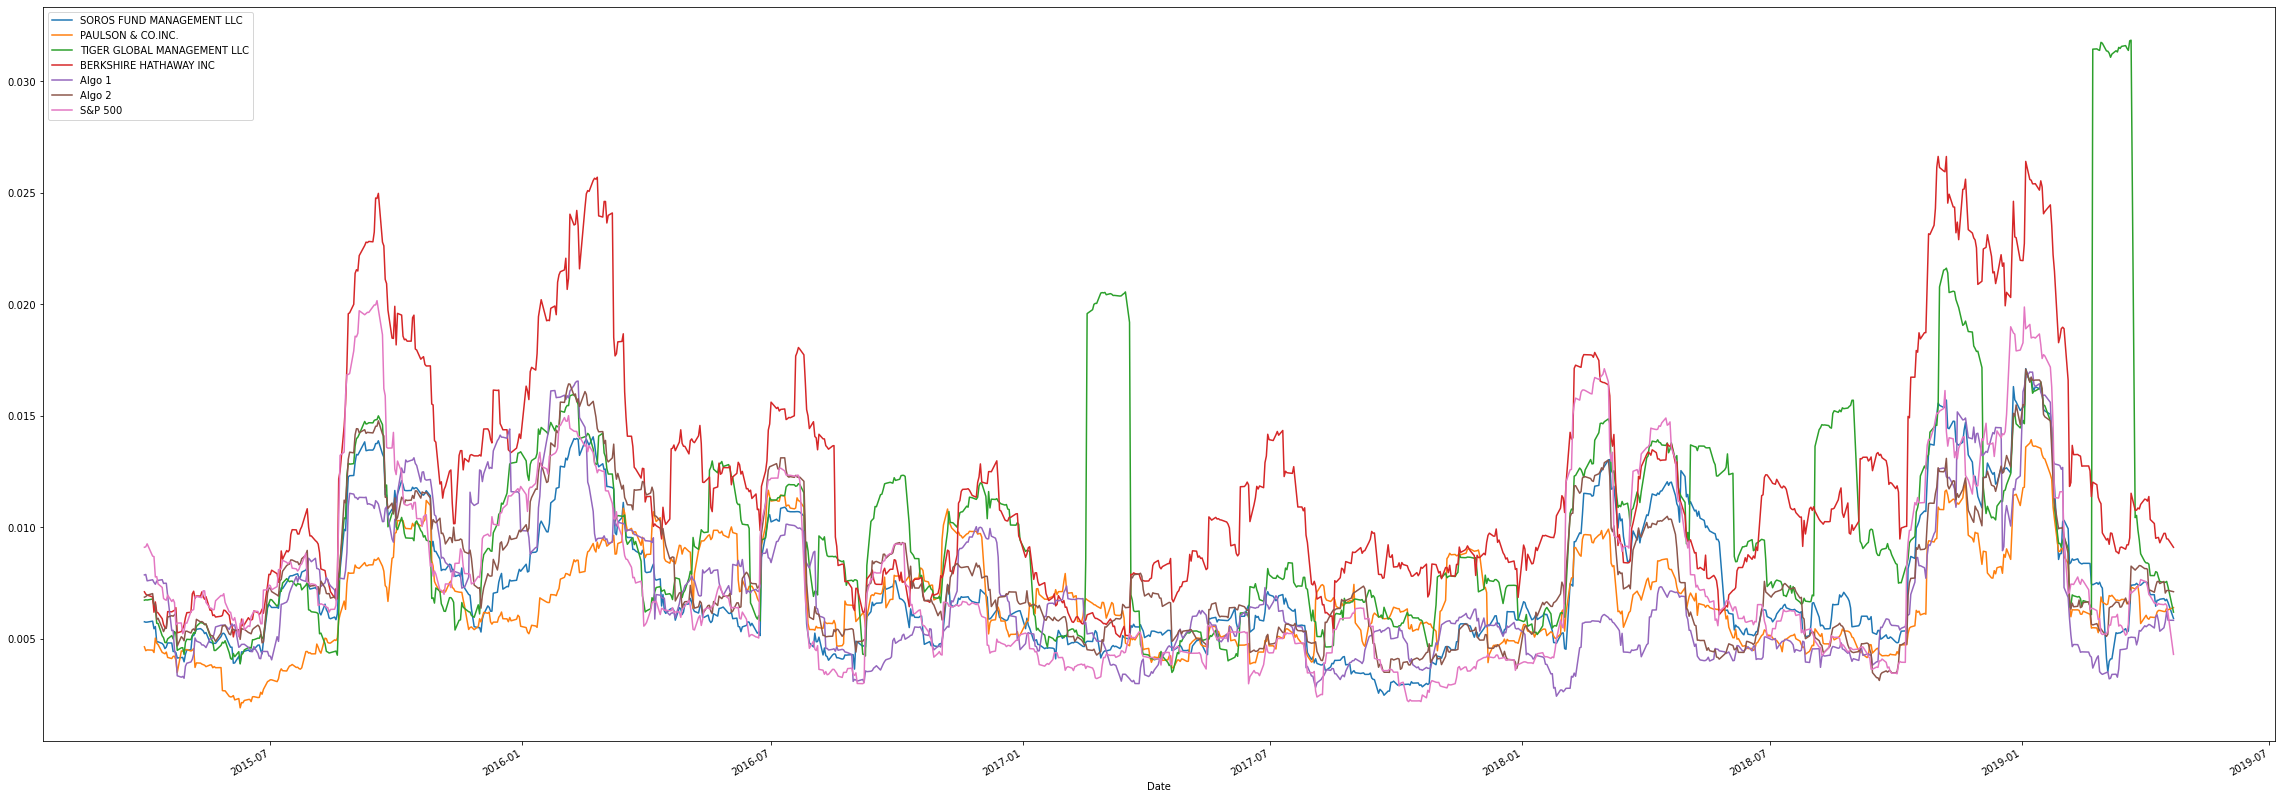

In [188]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
cp_rolling = cp.rolling(window=21).std().plot(figsize=(40,15))

In [179]:
# Construct a correlation table
# YOUR CODE HERE
correlation = cp.corr()

correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa59d08ceb0&gt;

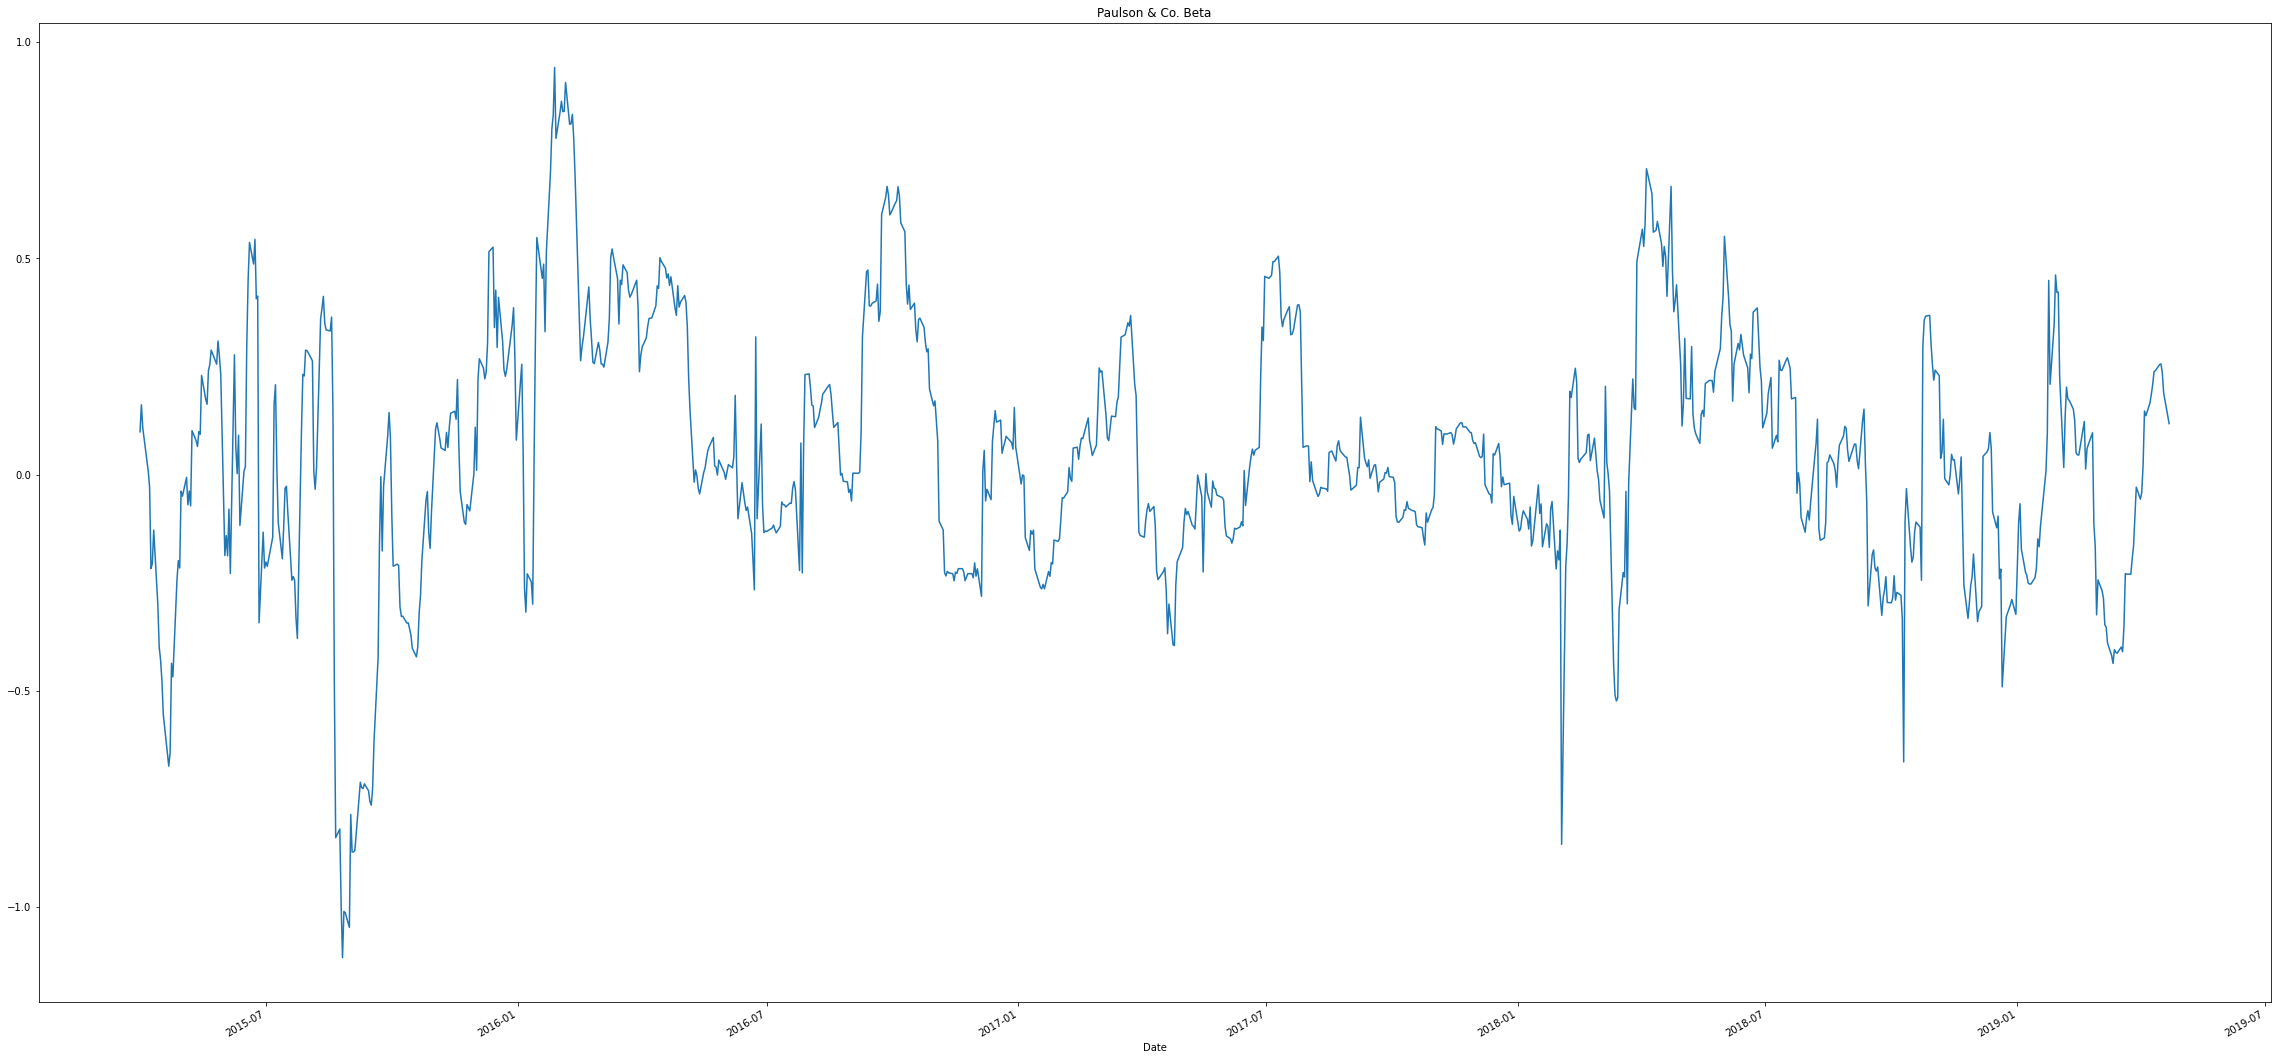

In [182]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

paulson_rc = cp["PAULSON & CO.INC. "].rolling(window=21).cov(cp["S&P 500"])

rolling_variance = cp["PAULSON & CO.INC. "].rolling(window=21).var()

paulson_beta = paulson_rc / rolling_variance

paulson_beta.plot(figsize=(40,20), title='Paulson & Co. Beta')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa59f7f5f70&gt;

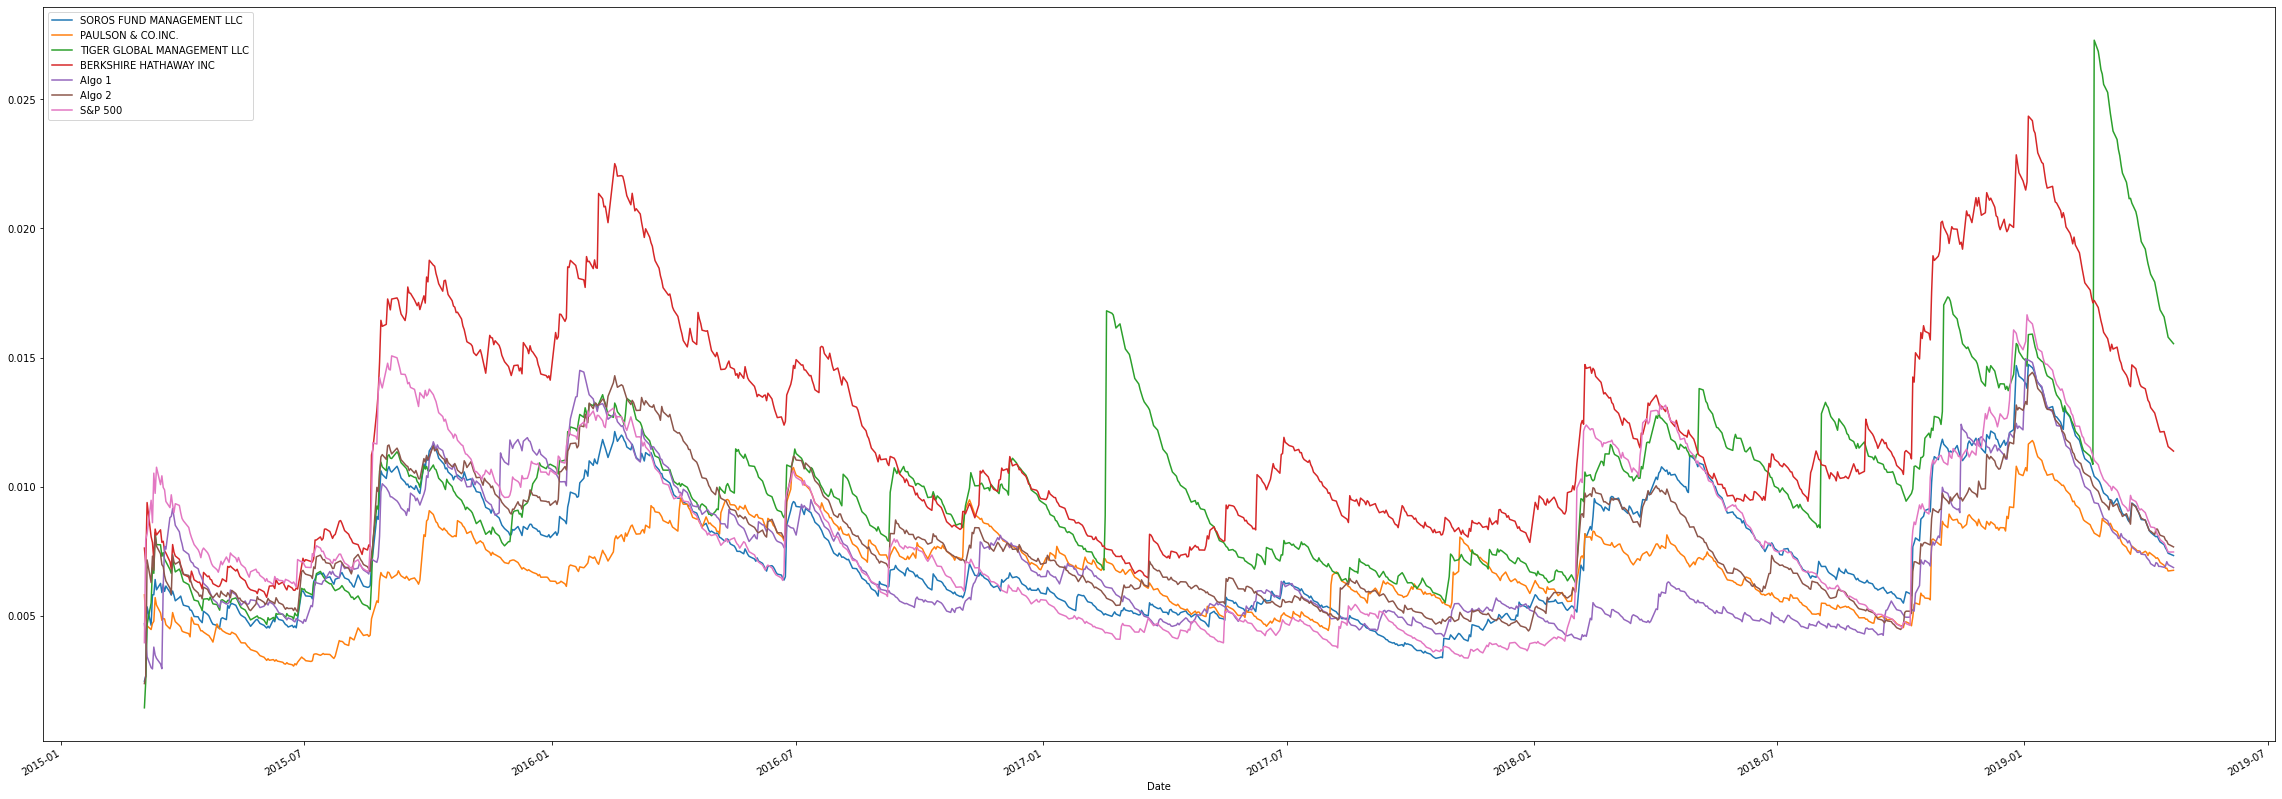

In [183]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

cp_ewm = cp.ewm(halflife=21).std()

cp_ewm.plot(figsize=(40,15))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [185]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (cp.mean() * 252) / (cumulative_daily_std * np.sqrt(252))

sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON &amp; CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&amp;P 500                       -0.518582
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa5a369cb50&gt;

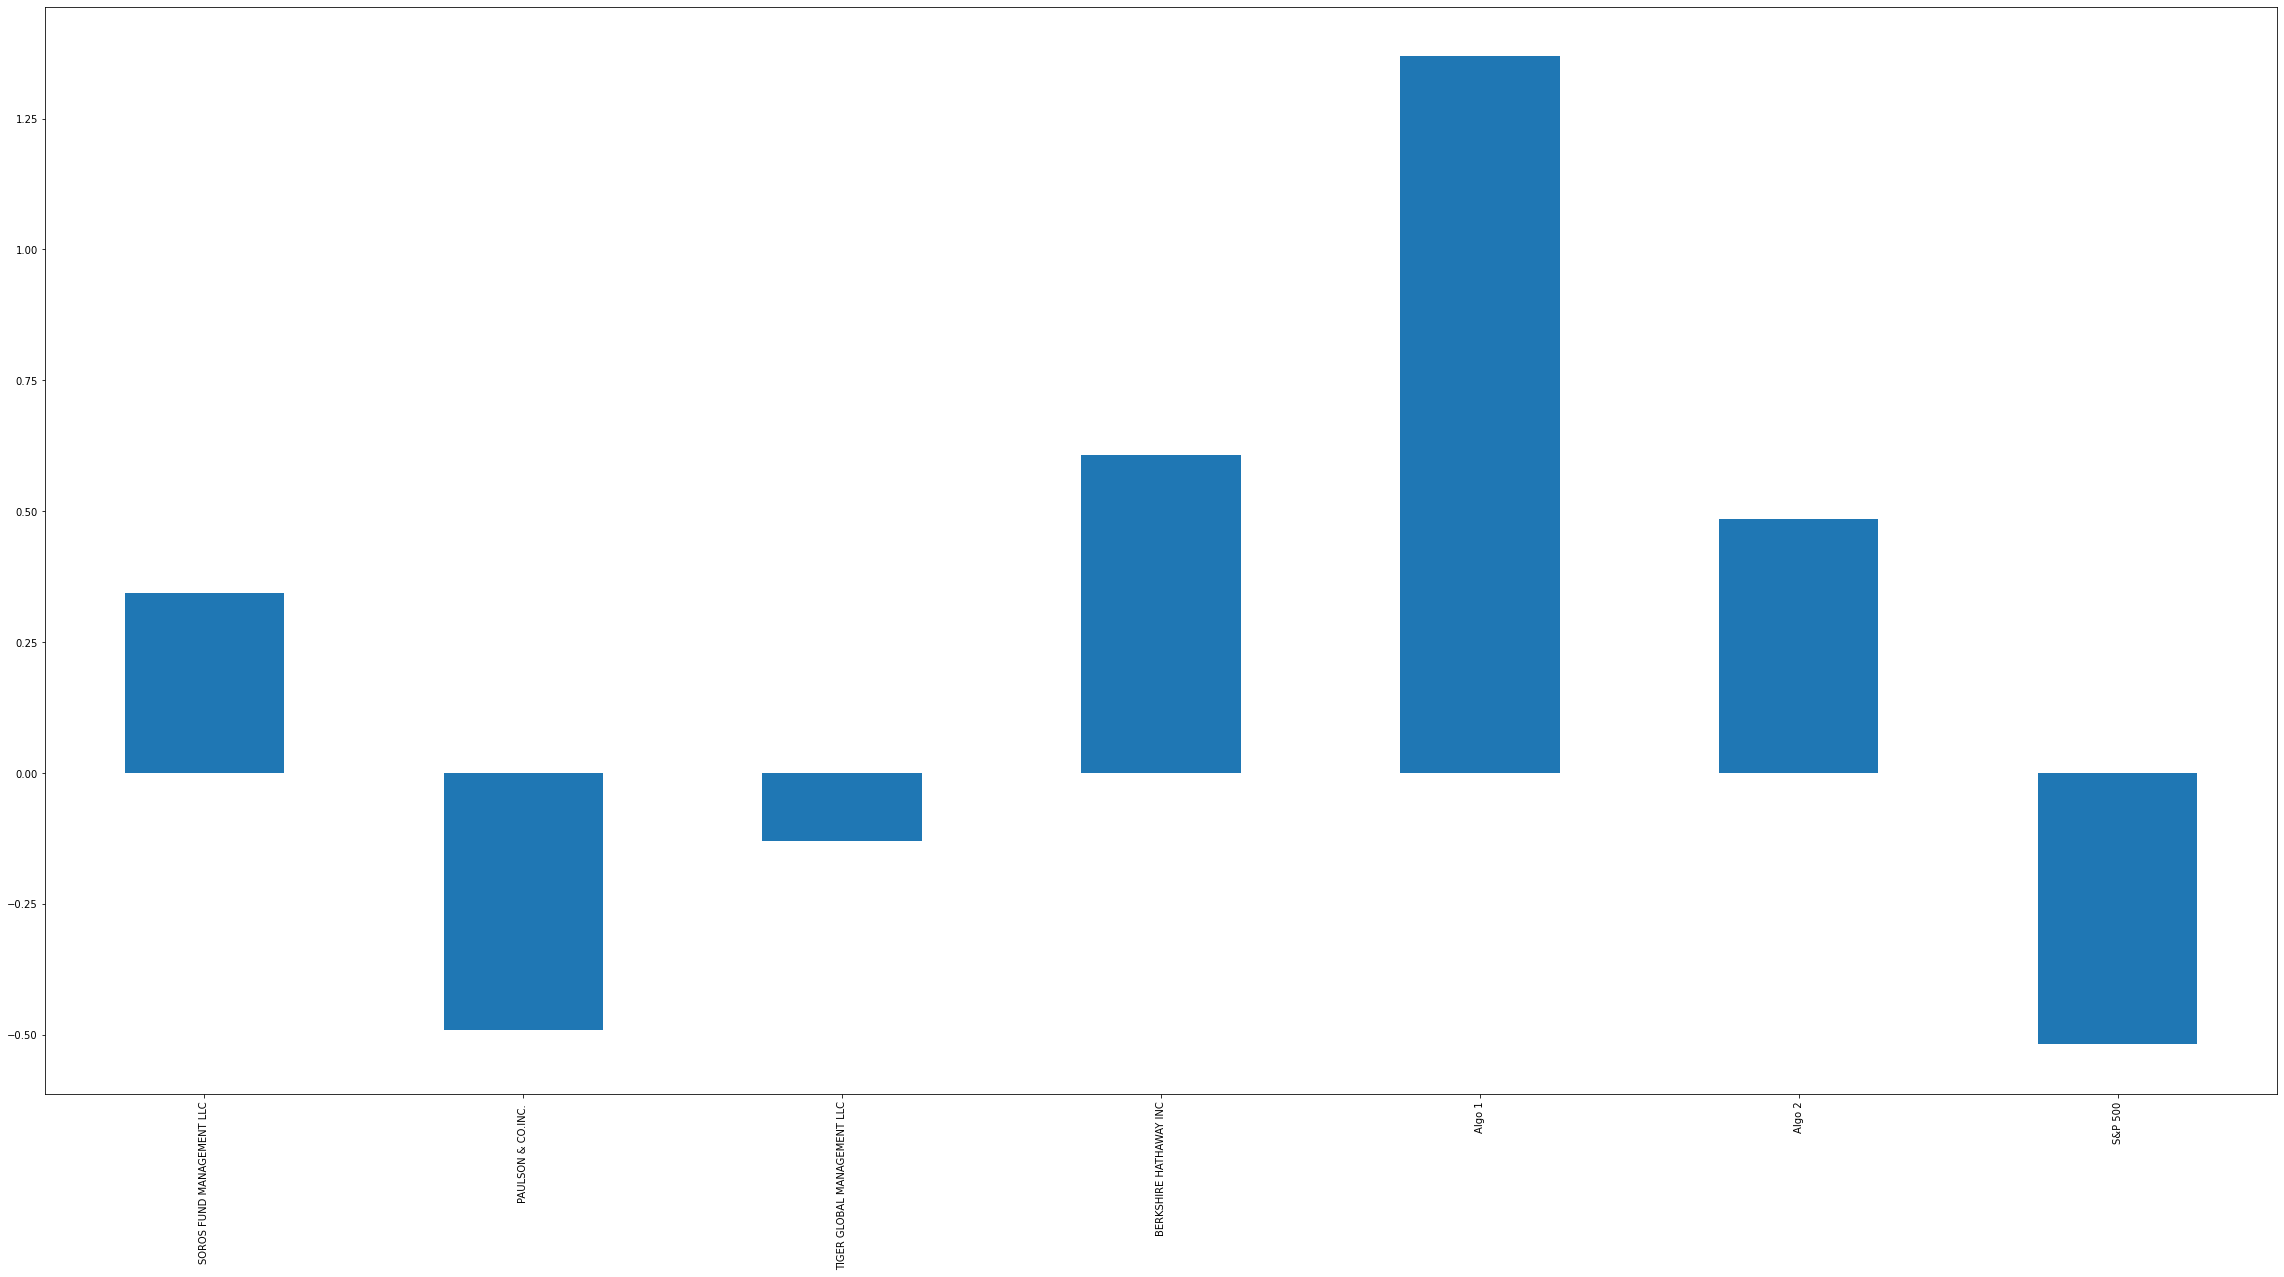

In [187]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratio.plot(kind='bar', figsize=(40,20))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [196]:
# Read the first stock
# YOUR CODE HERE
google_csv = Path("Instructions/Starter_Code/Resources/goog_historical.csv")

google_stock = pd.read_csv(google_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

google_stock.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [199]:
# Read the second stock
# YOUR CODE HERE
aapl_csv = Path("Instructions/Starter_Code/Resources/aapl_historical.csv")

aapl_stock = pd.read_csv(aapl_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

aapl_stock.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [202]:
# Read the third stock
# YOUR CODE HERE
cost_csv = Path("Instructions/Starter_Code/Resources/cost_historical.csv")

cost_stock = pd.read_csv(cost_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

cost_stock.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [209]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks = pd.concat([google_stock, aapl_stock, cost_stock], axis='rows', join='inner')

all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [211]:
# Reset the index
# YOUR CODE HERE
all_stocks.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40
...,...,...,...
745,2018-05-17,COST,199.60
746,2018-05-16,COST,198.71
747,2018-05-15,COST,195.48
748,2018-05-14,COST,195.88


In [215]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
columns = ['GOOG', 'AAPL', 'COST']

all_stocks.columns = columns

all_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [216]:
# Drop Nulls
# YOUR CODE HERE
all_stocks = all_stocks.dropna().copy()
all_stocks.isnull().sum()

GOOG    0
AAPL    0
COST    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [223]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

portfolio_returns = all_stocks.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

cumulative_returns

Trade DATE
2018-05-11    4.952033e+02
2018-05-14    2.454938e+05
2018-05-15    1.198132e+08
2018-05-16    5.877478e+10
2018-05-17    2.876398e+13
                  ...     
2019-05-03             inf
2019-05-06             inf
2019-05-07             inf
2019-05-08             inf
2019-05-09             inf
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_port_df = pd.concat([cp, all_stocks], axis='columns', join='inner')

combined_port_df.rename(columns={0:'Custom'}, inplace=True)

combined_port_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG,AAPL,COST
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,188.59,195.76,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,188.15,195.88,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,186.44,195.48,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,188.18,198.71,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,186.99,199.60,1078.59
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,186.31,198.96,1066.36
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,187.63,199.62,1079.58
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003238,187.16,198.97,1069.73
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.002027,188.36,198.14,1079.69
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,0.002363,188.15,198.89,1079.24


In [226]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_port_df = combined_port_df.dropna().copy()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [228]:
# Risk
# YOUR CODE HERE
cpd_std = combined_port_df.std()
annual_std = cpd_std * np.sqrt(252)

annual_std

SOROS FUND MANAGEMENT LLC         0.146589
PAULSON &amp; CO.INC.                 0.116683
TIGER GLOBAL MANAGEMENT LLC       0.232434
BERKSHIRE HATHAWAY INC            0.246819
Algo 1                            0.133645
Algo 2                            0.139204
S&amp;P 500                           0.152147
GOOG                            345.112320
AAPL                            219.950141
COST                           1055.438182
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa58c11c9a0&gt;

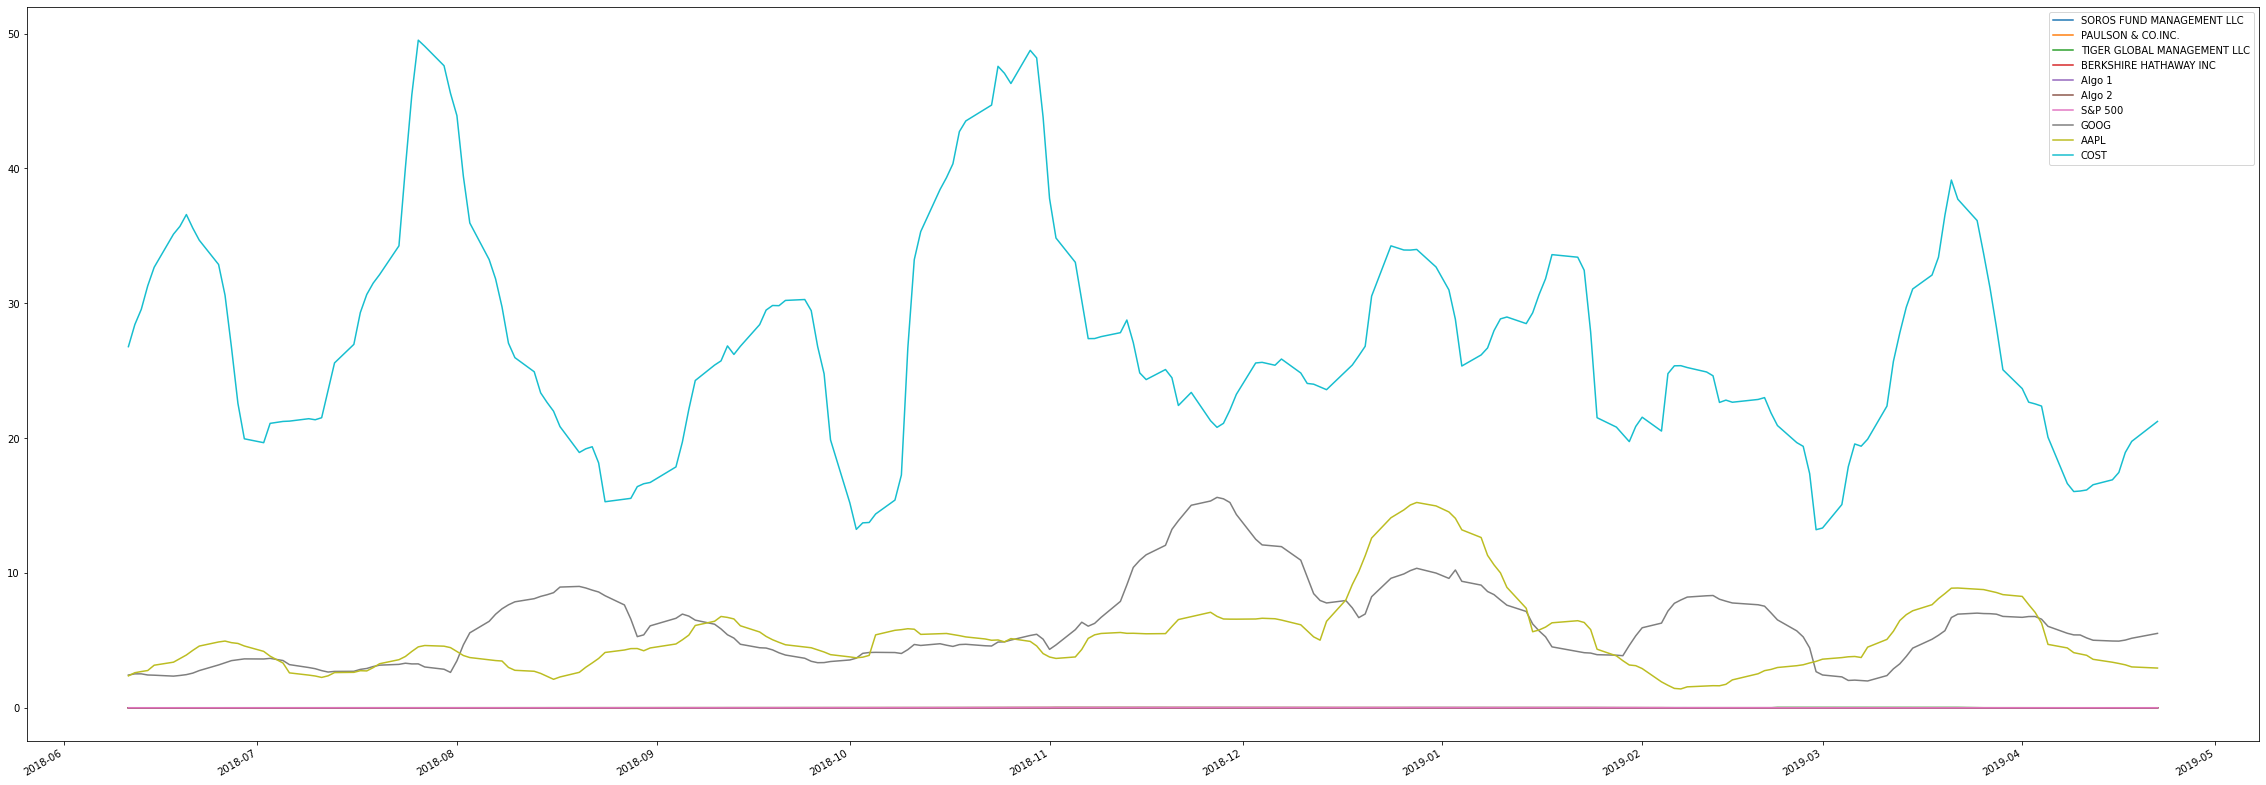

In [233]:
# Rolling
# YOUR CODE HERE

combined_port_df.rolling(window=21).std().plot(figsize=(40,15))

In [246]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
total_sharpe_ratio = (combined_port_df.mean() * 252) / cpd_std * np.sqrt(252)

total_sharpe_ratio



SOROS FUND MANAGEMENT LLC         86.881018
PAULSON &amp; CO.INC.                 59.482285
TIGER GLOBAL MANAGEMENT LLC     -265.166802
BERKSHIRE HATHAWAY INC            21.421154
Algo 1                           503.966280
Algo 2                             2.385701
S&amp;P 500                         -109.101429
GOOG                           35138.895766
AAPL                           63782.068493
COST                           68184.132496
dtype: float64

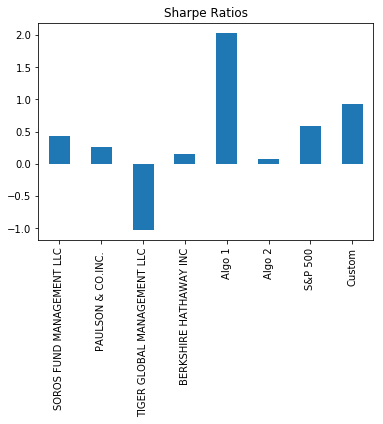

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


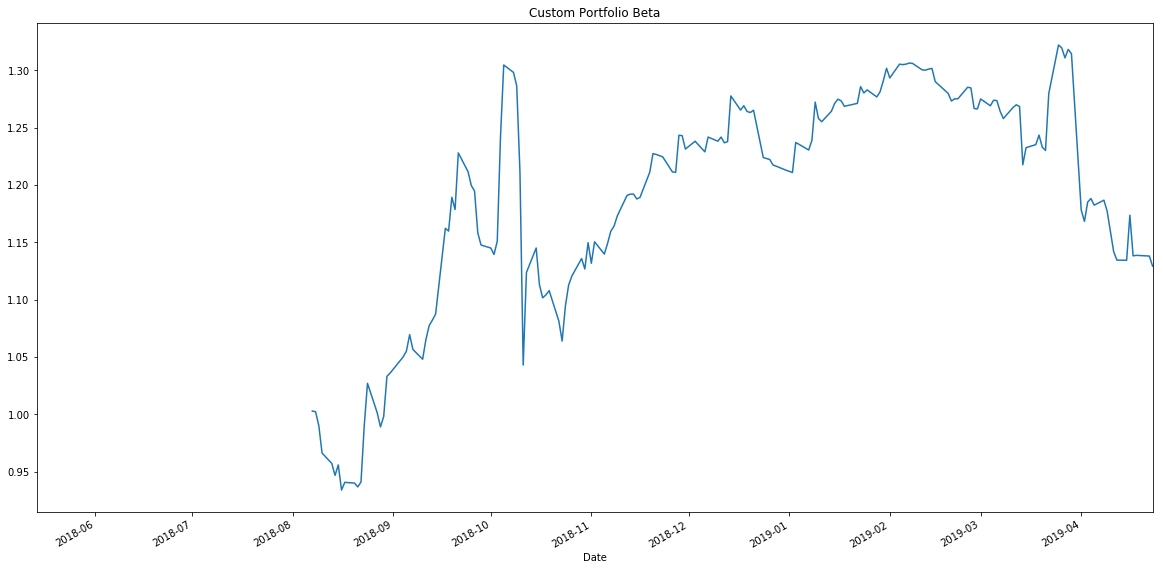

In [43]:
# Beta
# YOUR CODE HERE